# Inference: Adaptive Covariance MCMC

This example shows you how to perform Bayesian inference on a time series, using [Adaptive Covariance MCMC](http://pints.readthedocs.io/en/latest/mcmc_samplers/adaptive_covariance_mcmc.html).

It follows on from the [first sampling example](./sampling-first-example.ipynb).

In [ ]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints4/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
real_parameters = [0.015, 500]
times = np.linspace(0, 1000, 1000)
org_values = model.simulate(real_parameters, times)

# Add noise
noise = 10
values = org_values + np.random.normal(0, noise, org_values.shape)
real_parameters = np.array(real_parameters + [noise])

# Get properties of the noise sample
noise_sample_mean = np.mean(values - org_values)
noise_sample_std = np.std(values - org_values)

# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.UnknownNoiseLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, noise*0.1],
    [0.02, 600, noise*100]
)

# Create a posterior log-likelihood (log(likelihood * prior))
log_posterior = pints.LogPosterior(log_likelihood, log_prior)

# Choose starting points for 3 mcmc chains
xs = [
    real_parameters * 1.1,
    real_parameters * 0.9,
    real_parameters * 1.15,
]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_posterior, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Start adapting after 1000 iterations
mcmc.set_initial_phase_iterations(1000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)

# Discard warm up
chains = chains[:, 2000:, :]

# Check convergence using rhat criterion
print('R-hat:')
print(pints.rhat_all_params(chains))

# Look at distribution in chain 0
pints.plot.pairwise(chains[0], kde=True)

# Show graphs
plt.show()

Running...


C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_mcmc\_dram.py:126: RuntimeWarning: invalid value encountered in log
  scipy.stats.multivariate_normal.logpdf(x=self._Y1,mean=self._Y2,cov=self._sigma2,allow_singular=True) -
C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_mcmc\_dram.py:126: RuntimeWarning: overflow encountered in exp
  scipy.stats.multivariate_normal.logpdf(x=self._Y1,mean=self._Y2,cov=self._sigma2,allow_singular=True) -


Running...


C:\Users\bclamber\Desktop\AllPints\pints4\pints\pints\_mcmc\_dram.py:123: RuntimeWarning: invalid value encountered in log
  r_log += (np.log(1 - np.exp((self._Y1_log_pdf - fx))) -


-1
[[ 10.   0.]
 [  0.  10.]]
[[ 0.75967796  0.33566993]
 [ 0.33566993  0.16802032]]
-1
[[ 10.67428926   3.22576591]
 [  3.22576591   7.71716534]]
[[ 0.75967796  0.33566993]
 [ 0.33566993  0.16802032]]
-1
[[ 1.  0.]
 [ 0.  2.]]
[[ 0.10761413  0.0196917 ]
 [ 0.0196917   0.00577211]]
-1
[[ 8.2965224   3.07966375]
 [ 3.07966375  5.47333324]]
[[ 1.67948266  1.231525  ]
 [ 1.231525    0.97656055]]
-1
[[ 6.36914848  2.54109795]
 [ 2.54109795  4.03967332]]
[[ 1.70130666  1.30988011]
 [ 1.30988011  1.06633883]]
-1
[[ 4.87177826  2.04255265]
 [ 2.04255265  3.11779135]]
[[ 1.70130666  1.30988011]
 [ 1.30988011  1.06633883]]
-1
[[ 3.7569433   1.62497156]
 [ 1.62497156  2.41835968]]
[[ 1.45743922  1.18590057]
 [ 1.18590057  1.03173924]]
-1
[[ 3.25779401  1.16450941]
 [ 1.16450941  1.89964045]]
[[ 1.45743922  1.18590057]
 [ 1.18590057  1.03173924]]
-1
[[ 2.76253595  0.85899517]
 [ 0.85899517  1.50714128]]
[[ 1.28856735  0.67361214]
 [ 0.67361214  0.67780347]]
-1
[[ 2.28474516  0.65593779]
 [ 0.6559

-1
[[ 0.61292875  0.14557288]
 [ 0.14557288  0.53128559]]
[[ 0.23943779  0.05942609]
 [ 0.05942609  0.46167082]]
-1
[[ 0.29579884  0.17535704]
 [ 0.17535704  0.89841905]]
[[ 0.38012986  0.25477145]
 [ 0.25477145  0.58418834]]
-1
[[ 2.58430086 -0.19367954]
 [-0.19367954  2.84670294]]
[[ 0.33695239 -0.07685023]
 [-0.07685023  0.36518706]]
-1
[[ 0.5926927   0.11714054]
 [ 0.11714054  0.5247594 ]]
[[ 0.2321923   0.04584003]
 [ 0.04584003  0.44962103]]
-1
[[ 0.2794314   0.15872682]
 [ 0.15872682  0.87523162]]
[[ 0.38012986  0.25477145]
 [ 0.25477145  0.58418834]]
-1
[[ 2.42860239 -0.18171666]
 [-0.18171666  2.72917018]]
[[ 0.31698251 -0.07363008]
 [-0.07363008  0.35205758]]
-1
[[ 0.6059917   0.13968645]
 [ 0.13968645  0.512183  ]]
[[ 0.2321923   0.04584003]
 [ 0.04584003  0.44962103]]
-1
[[ 0.26513421  0.13710161]
 [ 0.13710161  0.88930833]]
[[ 0.38012986  0.25477145]
 [ 0.25477145  0.58418834]]
-1
[[ 2.28388637 -0.17063124]
 [-0.17063124  2.61375512]]
[[ 0.29838792 -0.07047821]
 [-0.070478

[[ 0.37823846  0.11232112]
 [ 0.11232112  1.91626647]]
[[ 0.26101348  0.2532874 ]
 [ 0.2532874   1.50776625]]
-1
[[ 0.45272085  0.02728183]
 [ 0.02728183  0.38325912]]
[[ 0.46360196  0.27095871]
 [ 0.27095871  0.5088547 ]]
-1
[[ 0.38382889  0.12156606]
 [ 0.12156606  1.85931541]]
[[ 0.26101348  0.2532874 ]
 [ 0.2532874   1.50776625]]
-1
[[ 0.44844229  0.03737218]
 [ 0.03737218  0.38079621]]
[[ 0.45402986  0.26683841]
 [ 0.26683841  0.49559695]]
-1
[[ 0.37087948  0.12080369]
 [ 0.12080369  1.83742995]]
[[ 0.26101348  0.2532874 ]
 [ 0.2532874   1.50776625]]
-1
[[ 0.44356876  0.04633162]
 [ 0.04633162  0.37770694]]
[[ 0.44440015  0.26252879]
 [ 0.26252879  0.48256647]]
-1
[[ 0.50551633  0.08861828]
 [ 0.08861828  0.38976382]]
[[ 0.44440015  0.26252879]
 [ 0.26252879  0.48256647]]
-1
[[ 0.93387922  0.07047454]
 [ 0.07047454  0.92155465]]
[[ 0.69295916  0.09363444]
 [ 0.09363444  0.59132397]]
-1
[[ 0.35838486  0.11983806]
 [ 0.11983806  1.81349925]]
[[ 0.26840361  0.26197035]
 [ 0.26197035 

[[ 0.52698345  0.09845517]
 [ 0.09845517  0.53588706]]
-1
[[ 1.08575871 -0.17619155]
 [-0.17619155  0.74953237]]
[[ 1.02989313 -0.20978552]
 [-0.20978552  0.81627288]]
-1
[[ 0.89785077 -0.55553207]
 [-0.55553207  1.17154169]]
[[ 0.80839238 -0.0834978 ]
 [-0.0834978   0.93427227]]
-1
[[ 0.68396431  0.0093279 ]
 [ 0.0093279   0.7855564 ]]
[[ 0.5253576   0.09591999]
 [ 0.09591999  0.52324416]]
-1
[[ 1.06501244 -0.17628102]
 [-0.17628102  0.73633038]]
[[ 1.01028343 -0.21034128]
 [-0.21034128  0.80462024]]
-1
[[ 0.90195264 -0.51545558]
 [-0.51545558  1.1731066 ]]
[[ 0.80839238 -0.0834978 ]
 [-0.0834978   0.93427227]]
-1
[[ 0.67443559  0.00741303]
 [ 0.00741303  0.76747436]]
[[ 0.52327187  0.09346021]
 [ 0.09346021  0.51092812]]
-1
[[ 1.04057651 -0.17211592]
 [-0.17211592  0.72007398]]
[[ 1.01028343 -0.21034128]
 [-0.21034128  0.80462024]]
-1
[[ 0.88835571 -0.52694303]
 [-0.52694303  1.21926166]]
[[ 0.80839238 -0.0834978 ]
 [-0.0834978   0.93427227]]
-1
[[ 1.01739254 -0.16529906]
 [-0.165299

 [ 0.06412461  0.55681902]]
-1
[[ 0.55839872 -0.17306381]
 [-0.17306381  1.0181289 ]]
[[ 0.56907024 -0.0556165 ]
 [-0.0556165   0.8974793 ]]
-1
[[ 0.44594066 -0.02036925]
 [-0.02036925  0.83053909]]
[[ 0.41358148  0.06412461]
 [ 0.06412461  0.55681902]]
-1
[[ 0.8580419  -0.12744968]
 [-0.12744968  0.9091098 ]]
[[ 0.65939659  0.09522979]
 [ 0.09522979  0.98169494]]
-1
[[ 0.55084618 -0.17078284]
 [-0.17078284  0.99946199]]
[[ 0.56907024 -0.0556165 ]
 [-0.0556165   0.8974793 ]]
-1
[[ 0.44073749 -0.02191778]
 [-0.02191778  0.81607865]]
[[ 0.41358148  0.06412461]
 [ 0.06412461  0.55681902]]
-1
[[ 0.8456131  -0.12735224]
 [-0.12735224  0.89384191]]
[[ 0.65939659  0.09522979]
 [ 0.09522979  0.98169494]]
-1
[[ 0.54333489 -0.16851128]
 [-0.16851128  0.98114592]]
[[ 0.5614255  -0.05320345]
 [-0.05320345  0.88141927]]
-1
[[ 0.43551758 -0.02336403]
 [-0.02336403  0.80185812]]
[[ 0.41255486  0.06162867]
 [ 0.06162867  0.54660362]]
-1
[[ 0.844726   -0.13270309]
 [-0.13270309  0.88140503]]
[[ 0.65939

 [-0.01150407  0.53960602]]
-1
[[ 0.79000128 -0.03467925]
 [-0.03467925  0.97676199]]
[[ 0.71303099 -0.06070071]
 [-0.06070071  1.21465766]]
-1
[[ 0.63843428 -0.08028429]
 [-0.08028429  0.79768045]]
[[ 0.67491213  0.02445773]
 [ 0.02445773  0.63701221]]
-1
[[ 0.50966542  0.18142038]
 [ 0.18142038  0.81043369]]
[[ 0.45898789 -0.01150407]
 [-0.01150407  0.53960602]]
-1
[[ 0.80727774 -0.05968175]
 [-0.05968175  0.98306419]]
[[ 0.71303099 -0.06070071]
 [-0.06070071  1.21465766]]
-1
[[ 0.52120279  0.16604309]
 [ 0.16604309  0.80492936]]
[[ 0.45898789 -0.01150407]
 [-0.01150407  0.53960602]]
-1
[[ 0.82332552 -0.08346396]
 [-0.08346396  0.98857168]]
[[ 0.73052666 -0.0828305 ]
 [-0.0828305   1.2138185 ]]
-1
[[ 0.63082847 -0.08094047]
 [-0.08094047  0.78624698]]
[[ 0.65546913  0.02946667]
 [ 0.02946667  0.63256136]]
-1
[[ 0.51275442  0.16382028]
 [ 0.16382028  0.79520226]]
[[ 0.45898789 -0.01150407]
 [-0.01150407  0.53960602]]
-1
[[ 0.84515181 -0.06309258]
 [-0.06309258  0.98323212]]
[[ 0.73052

-1
[[ 0.7274337  -0.03493   ]
 [-0.03493     0.71531289]]
[[ 0.6781088  -0.04740443]
 [-0.04740443  0.54657127]]
-1
[[ 0.92691549 -0.02437333]
 [-0.02437333  0.77576783]]
[[ 0.85207362 -0.01798949]
 [-0.01798949  0.88304685]]
-1
[[ 0.91390272 -0.02370331]
 [-0.02370331  0.76549528]]
[[ 0.85207362 -0.01798949]
 [-0.01798949  0.88304685]]
-1
[[ 0.90130555 -0.0205107 ]
 [-0.0205107   0.77687509]]
[[ 0.85207362 -0.01798949]
 [-0.01798949  0.88304685]]
-1
[[ 0.71751281 -0.03474586]
 [-0.03474586  0.70533392]]
[[ 0.64981882 -0.04434276]
 [-0.04434276  0.52912147]]
-1
[[ 0.48594291  0.12376591]
 [ 0.12376591  0.76608365]]
[[ 0.37993039 -0.00444994]
 [-0.00444994  0.5616004 ]]
-1
[[ 0.47998956  0.11901824]
 [ 0.11901824  0.76296245]]
[[ 0.37993039 -0.00444994]
 [-0.00444994  0.5616004 ]]
-1
[[ 0.70749859 -0.03350316]
 [-0.03350316  0.69817701]]
[[ 0.63656782 -0.04250476]
 [-0.04250476  0.50959577]]
-1
[[ 0.47650526  0.10760078]
 [ 0.10760078  0.77897124]]
[[ 0.37993039 -0.00444994]
 [-0.004449

-1
[[ 0.6411     0.1153878]
 [ 0.1153878  0.7078402]]
[[ 0.49457244  0.11963198]
 [ 0.11963198  0.7071563 ]]
-1
[[ 0.90465041  0.21022314]
 [ 0.21022314  1.26593353]]
[[ 0.86711104  0.19067169]
 [ 0.19067169  0.91224206]]
-1
[[ 0.96281429  0.0234819 ]
 [ 0.0234819   0.78022062]]
[[ 1.07132555  0.04781486]
 [ 0.04781486  0.7517874 ]]
-1
[[ 0.66166714  0.11054015]
 [ 0.11054015  0.69904132]]
[[ 0.49457244  0.11963198]
 [ 0.11963198  0.7071563 ]]
-1
[[ 0.6784093   0.11665284]
 [ 0.11665284  0.69222087]]
[[ 0.49457244  0.11963198]
 [ 0.11963198  0.7071563 ]]
-1
[[ 0.94289546  0.2046335 ]
 [ 0.2046335   1.24933286]]
[[ 0.90947135  0.17815173]
 [ 0.17815173  0.88913192]]
-1
[[ 0.67197113  0.12031786]
 [ 0.12031786  0.69460579]]
[[ 0.49457244  0.11963198]
 [ 0.11963198  0.7071563 ]]
-1
[[ 0.9673588   0.21093355]
 [ 0.21093355  1.23501307]]
[[ 0.90947135  0.17815173]
 [ 0.17815173  0.88913192]]
-1
[[ 0.95058748  0.02304058]
 [ 0.02304058  0.77019292]]
[[ 1.03450137  0.05417594]
 [ 0.05417594  

 [ 0.03019699  0.87146967]]
[[ 0.38247508  0.08651201]
 [ 0.08651201  0.67424456]]
-1
[[ 1.12970878 -0.04856458]
 [-0.04856458  1.46789538]]
[[ 1.08044037 -0.08619409]
 [-0.08619409  1.22561218]]
-1
[[ 0.65747195  0.03236275]
 [ 0.03236275  0.86217338]]
[[ 0.38247508  0.08651201]
 [ 0.08651201  0.67424456]]
-1
[[ 0.60971292  0.21389991]
 [ 0.21389991  1.14449748]]
[[ 0.64239077  0.08564946]
 [ 0.08564946  0.80557879]]
-1
[[ 1.1430383  -0.02112407]
 [-0.02112407  1.47750842]]
[[ 1.08044037 -0.08619409]
 [-0.08619409  1.22561218]]
-1
[[ 0.64982734  0.03053642]
 [ 0.03053642  0.862082  ]]
[[ 0.38247508  0.08651201]
 [ 0.08651201  0.67424456]]
-1
[[ 0.6048272   0.21137424]
 [ 0.21137424  1.13066614]]
[[ 0.64239077  0.08564946]
 [ 0.08564946  0.80557879]]
-1
[[ 1.15750738  0.00171348]
 [ 0.00171348  1.47821591]]
[[ 1.08044037 -0.08619409]
 [-0.08619409  1.22561218]]
-1
[[ 0.64826284  0.02009492]
 [ 0.02009492  0.86820279]]
[[ 0.38247508  0.08651201]
 [ 0.08651201  0.67424456]]
-1
[[ 0.60328

[[ 0.48002311  0.02738324]
 [ 0.02738324  0.81279627]]
-1
[[ 1.56036289 -0.23963157]
 [-0.23963157  1.75190772]]
[[ 1.29876471 -0.26823587]
 [-0.26823587  1.37940336]]
-1
[[ 0.55990555  0.09747082]
 [ 0.09747082  0.90034714]]
[[ 0.48002311  0.02738324]
 [ 0.02738324  0.81279627]]
-1
[[ 1.5539099  -0.20175376]
 [-0.20175376  1.84764779]]
[[ 1.29876471 -0.26823587]
 [-0.26823587  1.37940336]]
-1
[[ 1.54830444 -0.18275725]
 [-0.18275725  1.85157818]]
[[ 1.29876471 -0.26823587]
 [-0.26823587  1.37940336]]
-1
[[ 0.4786408   0.14359769]
 [ 0.14359769  0.95574851]]
[[ 0.48511471  0.10857982]
 [ 0.10857982  0.61243594]]
-1
[[ 0.55628554  0.09360418]
 [ 0.09360418  0.89306035]]
[[ 0.47702021  0.02278388]
 [ 0.02278388  0.7966514 ]]
-1
[[ 1.53957268 -0.18730194]
 [-0.18730194  1.83628782]]
[[ 1.29876471 -0.26823587]
 [-0.26823587  1.37940336]]
-1
[[ 0.4815651   0.15645514]
 [ 0.15645514  0.97037586]]
[[ 0.48511471  0.10857982]
 [ 0.10857982  0.61243594]]
-1
[[ 0.5520953   0.08663797]
 [ 0.086637

-1
[[ 0.61429767  0.11599519]
 [ 0.11599519  1.04589472]]
[[ 0.64043598  0.13433784]
 [ 0.13433784  0.71777904]]
-1
[[ 0.49316499  0.01641334]
 [ 0.01641334  0.88886188]]
[[ 0.39112444  0.02970273]
 [ 0.02970273  0.85388556]]
-1
[[ 0.92901664 -0.04499816]
 [-0.04499816  1.58293284]]
[[ 0.79079135 -0.20183408]
 [-0.20183408  1.553066  ]]
-1
[[ 0.60787946  0.11470338]
 [ 0.11470338  1.03994653]]
[[ 0.64043598  0.13433784]
 [ 0.13433784  0.71777904]]
-1
[[ 0.48811045  0.01592796]
 [ 0.01592796  0.88031877]]
[[ 0.38704587  0.02925481]
 [ 0.02925481  0.84560288]]
-1
[[ 0.92195562 -0.04750353]
 [-0.04750353  1.57014431]]
[[ 0.79079135 -0.20183408]
 [-0.20183408  1.553066  ]]
-1
[[ 0.60928583  0.11062746]
 [ 0.11062746  1.03014974]]
[[ 0.64043598  0.13433784]
 [ 0.13433784  0.71777904]]
-1
[[ 0.60405608  0.10578098]
 [ 0.10578098  1.03141001]]
[[ 0.64043598  0.13433784]
 [ 0.13433784  0.71777904]]
-1
[[ 0.91491802 -0.04992156]
 [-0.04992156  1.55741922]]
[[ 0.77665096 -0.20392628]
 [-0.203926

 [ 0.12464308  0.97682032]]
[[ 0.53339287  0.21842711]
 [ 0.21842711  0.87556158]]
-1
[[ 1.15139707 -0.10377172]
 [-0.10377172  1.26511497]]
[[ 1.1300301   0.0652242 ]
 [ 0.0652242   1.06649145]]
-1
[[ 0.58326667  0.11795591]
 [ 0.11795591  0.97630581]]
[[ 0.53339287  0.21842711]
 [ 0.21842711  0.87556158]]
-1
[[ 1.14710604 -0.09680581]
 [-0.09680581  1.25796176]]
[[ 1.1300301   0.0652242 ]
 [ 0.0652242   1.06649145]]
-1
[[ 0.73303511 -0.0301352 ]
 [-0.0301352   1.06056564]]
[[ 0.68147276  0.04895643]
 [ 0.04895643  0.96921443]]
-1
[[ 0.5795071   0.11172638]
 [ 0.11172638  0.97930276]]
[[ 0.53339287  0.21842711]
 [ 0.21842711  0.87556158]]
-1
[[ 1.15034646 -0.10956791]
 [-0.10956791  1.25878922]]
[[ 1.1300301   0.0652242 ]
 [ 0.0652242   1.06649145]]
-1
[[ 0.57574599  0.10566003]
 [ 0.10566003  0.9820194 ]]
[[ 0.53036039  0.21070605]
 [ 0.21070605  0.88061185]]
-1
[[ 0.57196672  0.10659461]
 [ 0.10659461  0.97433682]]
[[ 0.53036039  0.21070605]
 [ 0.21070605  0.88061185]]
-1
[[ 0.72604

-1
[[ 0.69782312 -0.08423223]
 [-0.08423223  1.30539685]]
[[ 0.53060361  0.06301787]
 [ 0.06301787  1.11143741]]
-1
[[ 0.52985969  0.01951628]
 [ 0.01951628  1.62865488]]
[[ 0.48469111  0.01686425]
 [ 0.01686425  1.41486547]]
-1
[[ 0.91155106 -0.2116289 ]
 [-0.2116289   0.98582618]]
[[ 0.83240147  0.01854344]
 [ 0.01854344  0.96723559]]
-1
[[ 0.69303965 -0.08338739]
 [-0.08338739  1.29315095]]
[[ 0.52755727  0.06240787]
 [ 0.06240787  1.1010124 ]]
-1
[[ 0.52707025  0.01631742]
 [ 0.01631742  1.61749842]]
[[ 0.48182085  0.01442558]
 [ 0.01442558  1.40465816]]
-1
[[ 0.68657555 -0.08199718]
 [-0.08199718  1.29161678]]
[[ 0.52755727  0.06240787]
 [ 0.06240787  1.1010124 ]]
-1
[[ 0.52648127  0.00749015]
 [ 0.00749015  1.61955072]]
[[ 0.48182085  0.01442558]
 [ 0.01442558  1.40465816]]
-1
[[ 0.68723302 -0.08816946]
 [-0.08816946  1.28629867]]
[[ 0.52755727  0.06240787]
 [ 0.06240787  1.1010124 ]]
-1
[[  5.25816442e-01  -1.08987543e-03]
 [ -1.08987543e-03   1.62126087e+00]]
[[ 0.48093634  0.0

 [ 0.12642314  0.95494853]]
[[ 0.53282605  0.11594541]
 [ 0.11594541  0.826644  ]]
-1
[[ 0.68947694  0.14181183]
 [ 0.14181183  1.54107444]]
[[ 0.50920046  0.07123749]
 [ 0.07123749  1.12300709]]
-1
[[ 0.6833331   0.14047102]
 [ 0.14047102  1.53170464]]
[[ 0.50920046  0.07123749]
 [ 0.07123749  1.12300709]]
-1
[[ 0.80041314  0.1260915 ]
 [ 0.1260915   0.95330587]]
[[ 0.52922717  0.10988488]
 [ 0.10988488  0.81467245]]
-1
[[ 0.6787282   0.13804074]
 [ 0.13804074  1.51899188]]
[[ 0.50920046  0.07123749]
 [ 0.07123749  1.12300709]]
-1
[[ 0.80430142  0.13653072]
 [ 0.13653072  0.95692031]]
[[ 0.52922717  0.10988488]
 [ 0.10988488  0.81467245]]
-1
[[ 0.67413907  0.13565358]
 [ 0.13565358  1.50637868]]
[[ 0.50666685  0.06944861]
 [ 0.06944861  1.11367056]]
-1
[[ 0.82298931  0.14987081]
 [ 0.14987081  0.95657603]]
[[ 0.52922717  0.10988488]
 [ 0.10988488  0.81467245]]
-1
[[ 0.67658754 -0.17824319]
 [-0.17824319  1.24135004]]
[[ 0.67073191 -0.00885427]
 [-0.00885427  1.04160695]]
-1
[[ 0.67385

 [ 0.02148105  1.144761  ]]
-1
[[ 0.83074927  0.15349132]
 [ 0.15349132  1.06331629]]
[[ 0.6595479   0.16466783]
 [ 0.16466783  0.81440936]]
-1
[[ 0.54783541  0.10384597]
 [ 0.10384597  1.2459173 ]]
[[ 0.48219603  0.02148105]
 [ 0.02148105  1.144761  ]]
-1
[[ 0.54330407  0.10369687]
 [ 0.10369687  1.23977472]]
[[ 0.48219603  0.02148105]
 [ 0.02148105  1.144761  ]]
-1
[[ 0.54041822  0.10598499]
 [ 0.10598499  1.23506183]]
[[ 0.48219603  0.02148105]
 [ 0.02148105  1.144761  ]]
-1
[[ 0.90757573 -0.04972417]
 [-0.04972417  1.20440671]]
[[ 0.7563723   0.083978  ]
 [ 0.083978    1.14555468]]
-1
[[ 0.82444761  0.15214991]
 [ 0.15214991  1.05422954]]
[[ 0.64968285  0.16177898]
 [ 0.16177898  0.79695214]]
-1
[[ 0.53613489  0.10624256]
 [ 0.10624256  1.22898225]]
[[ 0.48219603  0.02148105]
 [ 0.02148105  1.144761  ]]
-1
[[ 0.92494382 -0.04963579]
 [-0.04963579  1.19431096]]
[[ 0.7563723   0.083978  ]
 [ 0.083978    1.14555468]]
-1
[[ 0.82231765  0.15144223]
 [ 0.15144223  1.04529835]]
[[ 0.64744

[[ 0.82420063 -0.06597313]
 [-0.06597313  0.78565726]]
[[ 0.77057498  0.08136031]
 [ 0.08136031  0.78200807]]
-1
[[ 0.80022246  0.10031015]
 [ 0.10031015  0.87509622]]
[[ 0.62707069  0.11290663]
 [ 0.11290663  0.69132038]]
-1
[[ 0.59662679  0.06586822]
 [ 0.06586822  1.13107912]]
[[ 0.63700573 -0.02369145]
 [-0.02369145  1.15439104]]
-1
[[ 0.81918071 -0.06156365]
 [-0.06156365  0.78889974]]
[[ 0.77057498  0.08136031]
 [ 0.08136031  0.78200807]]
-1
[[ 0.79697704  0.10447327]
 [ 0.10447327  0.87552885]]
[[ 0.62707069  0.11290663]
 [ 0.11290663  0.69132038]]
-1
[[ 0.59469091  0.06458301]
 [ 0.06458301  1.12209139]]
[[ 0.63700573 -0.02369145]
 [-0.02369145  1.15439104]]
-1
[[ 0.81354375 -0.06021294]
 [-0.06021294  0.78338222]]
[[ 0.77057498  0.08136031]
 [ 0.08136031  0.78200807]]
-1
[[ 0.79370549  0.10852079]
 [ 0.10852079  0.87583504]]
[[ 0.62411577  0.115595  ]
 [ 0.115595    0.69172759]]
-1
[[ 0.58986962  0.06411859]
 [ 0.06411859  1.1136782 ]]
[[ 0.63700573 -0.02369145]
 [-0.02369145 

-1
[[ 0.40933157  0.03424207]
 [ 0.03424207  1.02848128]]
[[ 0.48874446 -0.00473551]
 [-0.00473551  0.88657375]]
-1
[[ 0.63658883 -0.13973201]
 [-0.13973201  1.1526736 ]]
[[ 0.73285982 -0.04242471]
 [-0.04242471  0.87733699]]
-1
[[ 0.7606055   0.15331752]
 [ 0.15331752  0.7668503 ]]
[[ 0.50757481  0.04990917]
 [ 0.04990917  0.69822731]]
-1
[[ 0.4098598   0.04256354]
 [ 0.04256354  1.04033204]]
[[ 0.48874446 -0.00473551]
 [-0.00473551  0.88657375]]
-1
[[ 0.63297289 -0.14600371]
 [-0.14600371  1.18588351]]
[[ 0.72935991 -0.05214852]
 [-0.05214852  0.91781748]]
-1
[[ 0.75522507  0.15032926]
 [ 0.15032926  0.76640471]]
[[ 0.50415762  0.0478643 ]
 [ 0.0478643   0.69767988]]
-1
[[ 0.40668621  0.04237602]
 [ 0.04237602  1.03351958]]
[[ 0.48874446 -0.00473551]
 [-0.00473551  0.88657375]]
-1
[[ 0.62958374 -0.14089063]
 [-0.14089063  1.18751808]]
[[ 0.72935991 -0.05214852]
 [-0.05214852  0.91781748]]
-1
[[ 0.40456201  0.04131529]
 [ 0.04131529  1.02599154]]
[[ 0.48874446 -0.00473551]
 [-0.004735

[[ 0.46040558  0.02431018]
 [ 0.02431018  0.86107119]]
-1
[[ 0.84759602 -0.25542872]
 [-0.25542872  1.27750755]]
[[ 0.79915387 -0.16594584]
 [-0.16594584  1.07974746]]
-1
[[ 0.71714563  0.12923416]
 [ 0.12923416  0.73501844]]
[[ 0.48757715  0.14875965]
 [ 0.14875965  0.78924331]]
-1
[[ 0.43015293  0.05287829]
 [ 0.05287829  1.09304326]]
[[ 0.46040558  0.02431018]
 [ 0.02431018  0.86107119]]
-1
[[ 0.85620078 -0.27140727]
 [-0.27140727  1.28947213]]
[[ 0.79915387 -0.16594584]
 [-0.16594584  1.07974746]]
-1
[[ 0.71173053  0.12788037]
 [ 0.12788037  0.75506302]]
[[ 0.48757715  0.14875965]
 [ 0.14875965  0.78924331]]
-1
[[ 0.42695428  0.05220285]
 [ 0.05220285  1.08697998]]
[[ 0.46040558  0.02431018]
 [ 0.02431018  0.86107119]]
-1
[[ 0.862762   -0.29022662]
 [-0.29022662  1.31350685]]
[[ 0.79915387 -0.16594584]
 [-0.16594584  1.07974746]]
-1
[[ 0.7064958   0.12835769]
 [ 0.12835769  0.76382701]]
[[ 0.48757715  0.14875965]
 [ 0.14875965  0.78924331]]
-1
[[ 0.4237797   0.05153677]
 [ 0.051536

-1
[[ 0.74216289  0.2189758 ]
 [ 0.2189758   0.81068228]]
[[ 0.60995202  0.14445309]
 [ 0.14445309  0.98850246]]
-1
[[ 0.87601913 -0.25965687]
 [-0.25965687  1.32293479]]
[[ 0.82902093 -0.14739905]
 [-0.14739905  1.19137987]]
-1
[[ 0.74443702  0.22128188]
 [ 0.22128188  0.80673109]]
[[ 0.61249997  0.14719109]
 [ 0.14719109  0.98332236]]
-1
[[ 0.62041814  0.05544021]
 [ 0.05544021  1.06879363]]
[[ 0.53478371  0.09779443]
 [ 0.09779443  0.91643735]]
-1
[[ 0.74207619  0.22339982]
 [ 0.22339982  0.80535316]]
[[ 0.61249997  0.14719109]
 [ 0.14719109  0.98332236]]
-1
[[ 0.73711027  0.22486357]
 [ 0.22486357  0.82018847]]
[[ 0.61249997  0.14719109]
 [ 0.14719109  0.98332236]]
-1
[[ 0.6251187   0.05133811]
 [ 0.05133811  1.0624912 ]]
[[ 0.54338838  0.09893092]
 [ 0.09893092  0.90353646]]
-1
[[ 0.87693763 -0.27554505]
 [-0.27554505  1.35713701]]
[[ 0.81239555 -0.14012115]
 [-0.14012115  1.1977962 ]]
-1
[[ 0.73173683  0.22418519]
 [ 0.22418519  0.8651159 ]]
[[ 0.61249997  0.14719109]
 [ 0.147191

-1
[[ 1.44509837 -0.5140948 ]
 [-0.5140948   1.28134494]]
[[ 1.17607252 -0.22697358]
 [-0.22697358  1.1915943 ]]
-1
[[ 0.78716514  0.20741255]
 [ 0.20741255  1.18927491]]
[[ 0.69352396  0.11853208]
 [ 0.11853208  1.288348  ]]
-1
[[ 0.74912212  0.12155171]
 [ 0.12155171  1.33745225]]
[[ 0.62117778  0.0815941 ]
 [ 0.0815941   1.34771533]]
-1
[[ 1.44521476 -0.50250758]
 [-0.50250758  1.27878076]]
[[ 1.17607252 -0.22697358]
 [-0.22697358  1.1915943 ]]
-1
[[ 0.80497989  0.201428  ]
 [ 0.201428    1.18174024]]
[[ 0.71365379  0.1138465 ]
 [ 0.1138465   1.27983262]]
-1
[[ 1.43844871 -0.50190619]
 [-0.50190619  1.27245425]]
[[ 1.17607252 -0.22697358]
 [-0.22697358  1.1915943 ]]
-1
[[ 0.81823411  0.20018124]
 [ 0.20018124  1.17338994]]
[[ 0.71365379  0.1138465 ]
 [ 0.1138465   1.27983262]]
-1
[[ 0.74456707  0.12157829]
 [ 0.12157829  1.329129  ]]
[[ 0.61338537  0.07779067]
 [ 0.07779067  1.33654733]]
-1
[[ 1.43050494 -0.5032428 ]
 [-0.5032428   1.27500643]]
[[ 1.17607252 -0.22697358]
 [-0.226973

[[ 0.68559233  0.00953597]
 [ 0.00953597  1.25018122]]
[[ 0.65814313 -0.06466314]
 [-0.06466314  1.09534647]]
-1
[[ 1.24219826 -0.10535614]
 [-0.10535614  1.044311  ]]
[[ 1.03843526 -0.02399557]
 [-0.02399557  1.04408342]]
-1
[[ 1.04915623 -0.0316233 ]
 [-0.0316233   1.12348888]]
[[ 0.83347288 -0.05759924]
 [-0.05759924  1.26200835]]
-1
[[ 0.68135834  0.00985339]
 [ 0.00985339  1.24196482]]
[[ 0.65402519 -0.0638184 ]
 [-0.0638184   1.08829358]]
-1
[[ 1.24853957 -0.10404213]
 [-0.10404213  1.03729903]]
[[ 1.03843526 -0.02399557]
 [-0.02399557  1.04408342]]
-1
[[ 1.04756513 -0.03669742]
 [-0.03669742  1.12079453]]
[[ 0.83347288 -0.05759924]
 [-0.05759924  1.26200835]]
-1
[[ 0.67727866  0.01102565]
 [ 0.01102565  1.23615804]]
[[ 0.65402519 -0.0638184 ]
 [-0.0638184   1.08829358]]
-1
[[ 1.04366032 -0.03480346]
 [-0.03480346  1.11394271]]
[[ 0.83347288 -0.05759924]
 [-0.05759924  1.26200835]]
-1
[[ 0.6726541   0.01096125]
 [ 0.01096125  1.22787897]]
[[ 0.65402519 -0.0638184 ]
 [-0.0638184  

[[ 0.95267712 -0.04212845]
 [-0.04212845  0.82468725]]
-1
[[ 0.81243462 -0.05314545]
 [-0.05314545  0.97342453]]
[[ 0.63733706 -0.06419243]
 [-0.06419243  1.00961873]]
-1
[[ 0.5872418  -0.02755166]
 [-0.02755166  1.06655765]]
[[ 0.56003482 -0.06724274]
 [-0.06724274  0.90728475]]
-1
[[ 1.02270247 -0.05098661]
 [-0.05098661  0.87392494]]
[[ 0.95267712 -0.04212845]
 [-0.04212845  0.82468725]]
-1
[[ 0.82160186 -0.05121898]
 [-0.05121898  0.96712355]]
[[ 0.63733706 -0.06419243]
 [-0.06419243  1.00961873]]
-1
[[ 0.58796042 -0.02444733]
 [-0.02444733  1.06134372]]
[[ 0.56091706 -0.06371794]
 [-0.06371794  0.90333971]]
-1
[[ 1.03089316 -0.04948802]
 [-0.04948802  0.86830052]]
[[ 0.95267712 -0.04212845]
 [-0.04212845  0.82468725]]
-1
[[ 1.02633948 -0.05145817]
 [-0.05145817  0.86502745]]
[[ 0.95267712 -0.04212845]
 [-0.04212845  0.82468725]]
-1
[[ 0.8305139  -0.04932642]
 [-0.04932642  0.96086309]]
[[ 0.62944057 -0.06749366]
 [-0.06749366  1.02782245]]
-1
[[ 0.58861323 -0.02140299]
 [-0.021402

-1
[[ 0.76873954  0.00317574]
 [ 0.00317574  0.90790723]]
[[ 0.68387181  0.06371256]
 [ 0.06371256  0.97677652]]
-1
[[ 0.56896055  0.02234065]
 [ 0.02234065  1.03933802]]
[[ 0.53824889 -0.00796494]
 [-0.00796494  0.96718721]]
-1
[[ 0.85288713  0.02400134]
 [ 0.02400134  0.7858894 ]]
[[ 0.71502165  0.03351998]
 [ 0.03351998  0.8176569 ]]
-1
[[ 0.76511493  0.00220549]
 [ 0.00220549  0.90270346]]
[[ 0.68387181  0.06371256]
 [ 0.06371256  0.97677652]]
-1
[[ 0.86537192  0.02474626]
 [ 0.02474626  0.78092667]]
[[ 0.73099154  0.03557085]
 [ 0.03557085  0.81269726]]
-1
[[ 0.76149687  0.00125388]
 [ 0.00125388  0.89752542]]
[[ 0.68156225  0.06200312]
 [ 0.06200312  0.97125654]]
-1
[[ 0.56707856  0.02227624]
 [ 0.02227624  1.03264108]]
[[ 0.52995223 -0.00957375]
 [-0.00957375  0.95040567]]
-1
[[ 0.5645157   0.02119427]
 [ 0.02119427  1.02679448]]
[[ 0.52724501 -0.01029163]
 [-0.01029163  0.94514214]]
-1
[[  7.57886033e-01   3.20758853e-04]
 [  3.20758853e-04   8.92373748e-01]]
[[ 0.68858332  0.0

 [-0.03425059  0.93726596]]
[[ 0.78697788 -0.03910883]
 [-0.03910883  0.72360751]]
-1
[[ 0.84170685  0.05465582]
 [ 0.05465582  0.90957142]]
[[ 0.61818028  0.00861302]
 [ 0.00861302  0.94421799]]
-1
[[ 0.71552042  0.09362893]
 [ 0.09362893  0.96083578]]
[[ 0.49273833  0.01370661]
 [ 0.01370661  0.89170213]]
-1
[[ 0.92719635 -0.03205534]
 [-0.03205534  0.9320548 ]]
[[ 0.78697788 -0.03910883]
 [-0.03910883  0.72360751]]
-1
[[ 0.8389523   0.05634485]
 [ 0.05634485  0.9054842 ]]
[[ 0.61818028  0.00861302]
 [ 0.00861302  0.94421799]]
-1
[[ 0.71190597  0.09268515]
 [ 0.09268515  0.95495495]]
[[ 0.49273833  0.01370661]
 [ 0.01370661  0.89170213]]
-1
[[ 0.92184522 -0.03217982]
 [-0.03217982  0.92653876]]
[[ 0.78697788 -0.03910883]
 [-0.03910883  0.72360751]]
-1
[[ 0.83376872  0.05697602]
 [ 0.05697602  0.91076568]]
[[ 0.61818028  0.00861302]
 [ 0.00861302  0.94421799]]
-1
[[ 0.92005005 -0.03323748]
 [-0.03323748  0.92119808]]
[[ 0.78697788 -0.03910883]
 [-0.03910883  0.72360751]]
-1
[[ 0.82923

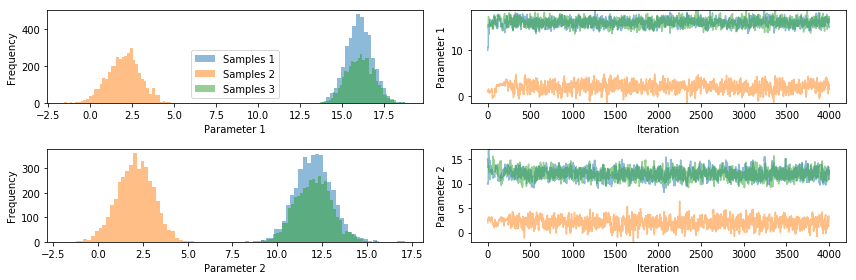

R-hat:
[9.5862633284239607, 5.6836582367979291]


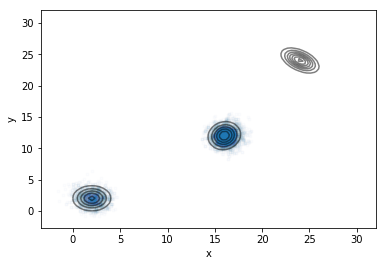

In [1]:
import os
os.chdir('C:/Users/bclamber/Desktop/AllPints/pints4/pints')
from __future__ import print_function
import pints
import pints.toy as toy
import pints.plot
import numpy as np
import matplotlib.pyplot as plt

# Load a multi-modal logpdf
log_pdf = pints.toy.MultimodalNormalLogPDF(
    [
        [2, 2],
        [16, 12],
        [24, 24],
    ],
    [
        [[1.2, 0.0], [0.0, 1.2]],
        [[0.8, 0.1], [0.1, 1.4]],
        [[1.0, -0.5], [-0.5, 1.0]],
    ]        
)

# Choose starting points for 3 mcmc chains
xs = [[10, 10], [1,2], [15,15]]

# Create mcmc routine
mcmc = pints.MCMCSampling(log_pdf, 3, xs, method=pints.DramMCMC)

# Add stopping criterion
mcmc.set_max_iterations(4000)

# Disable logging mode
mcmc.set_log_to_screen(False)

# Run!
print('Running...')
chains = mcmc.run()
print('Done!')

# Show traces and histograms
pints.plot.trace(chains)
plt.show()

# Discard warm up
chains = chains[:, 2000:, :]

# Print Rhat
print('R-hat:')
print(pints.rhat_all_params(chains))

samples = np.vstack(chains)
x = np.linspace(0, 32, 80)
y = np.linspace(0, 32, 80)
X, Y = np.meshgrid(x, y)
Z = np.exp([[log_pdf([i, j]) for i in x] for j in y])
plt.contour(X, Y, Z, colors='k', alpha=0.5)
plt.scatter(samples[:,0], samples[:,1], marker='.', alpha=0.01)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [3]:
import scipy
    scipy.stats.multivariate_normal.logpdf(x=[1,1],mean=[1,0],cov=)

TypeError: logpdf() missing 1 required positional argument: 'x'